In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
from windrose import WindroseAxes
import seaborn as sns
import bottleneck as bn
import dataframe_image as dfi
from butterworth import butterworth

In [2]:
# netCDF files
fn='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\DUNEX\\1149\\1149wxt-a.nc'

# Export path
figpath1149='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\DUNEX\\1149\\Figures\\'

In [3]:
# Read in mooring 1149
ds=xr.open_dataset(fn)

# Make statistics table
df=ds.to_dataframe()
df_stats=df.describe()
dfi.export(df_stats, figpath1149+'1149_stats.png')

In [4]:
# Put variables into arrays
time=ds['time'].values
wdir_mean=ds['WD_410'].values
wdir_max=ds['WD_gust'].values
wsp_min=ds['WS_min'].values
wsp_mean=ds['WS_401'].values
wsp_max=ds['WG_402'].values
temp=ds['T_21'].values
relh=ds['RH_910'].values
rain=ds['Rn_963'].values

# Get rid of bad rows
nans=np.argwhere(np.isnan(wdir_mean)) # Find rows of NaNs

time=np.delete(time,nans)
wdir_mean=np.delete(wdir_mean,nans)
wdir_max=np.delete(wdir_max,nans)
wsp_min=np.delete(wsp_min,nans)
wsp_mean=np.delete(wsp_mean,nans)
wsp_max=np.delete(wsp_max,nans)
temp=np.delete(temp,nans)
relh=np.delete(relh,nans)
rain=np.delete(rain,nans)

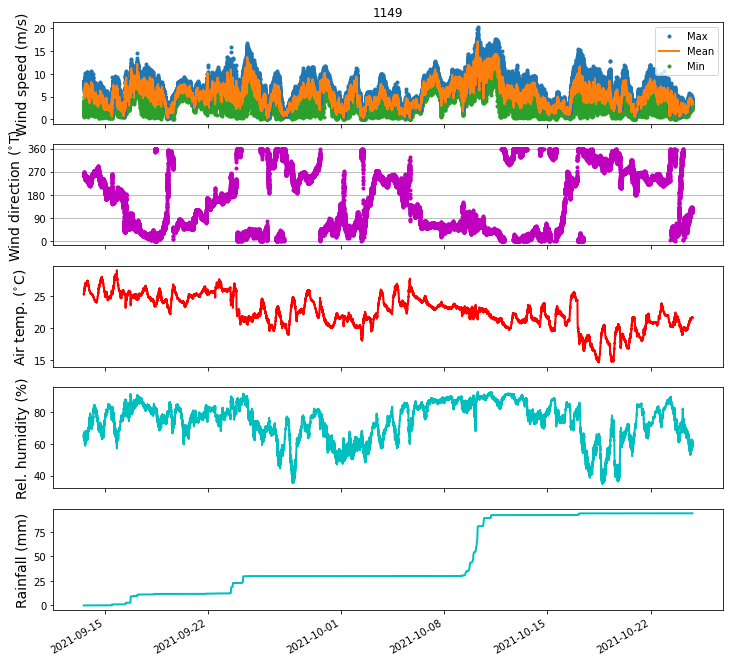

In [5]:
# Time-series plots
fig, ax=plt.subplots(nrows=5, ncols=1, sharey=False, sharex=True, squeeze=True, figsize = (12,12))

# Wind speed
ax[0].plot(time,wsp_max, '.',zorder=1,label='Max')
ax[0].plot(time,wsp_mean,'-',linewidth=2,zorder=2,label='Mean')
ax[0].plot(time,wsp_min, '.',zorder=0,label='Min')
ax[0].set_ylabel('Wind speed (m/s)',fontsize=14)
ax[0].legend()
ax[0].title.set_text('1149')
fig.autofmt_xdate() # Rotate x-axis labels so you can read all of them

# Wind direction
ax[1].plot(time,wdir_mean,'m.',linewidth=2)
ax[1].set_yticks([0.,90.,180.,270,360])
ax[1].set_ylabel('Wind direction ($^{\circ}$T)',fontsize=14)
ax[1].grid(axis = 'y')

# Temp
ax[2].plot(time,temp,'r-',linewidth=2)
ax[2].set_ylabel('Air temp. ($^{\circ}$C)',fontsize=14)

# Relative humidity
ax[3].plot(time,relh,'c-',linewidth=2)
ax[3].set_ylabel('Rel. humidity (%)',fontsize=14);

# Rainfall
ax[4].plot(time,rain,'c-',linewidth=2)
ax[4].set_ylabel('Rainfall (mm)',fontsize=14);

fig.savefig(figpath1149+'1149_Time_Series')

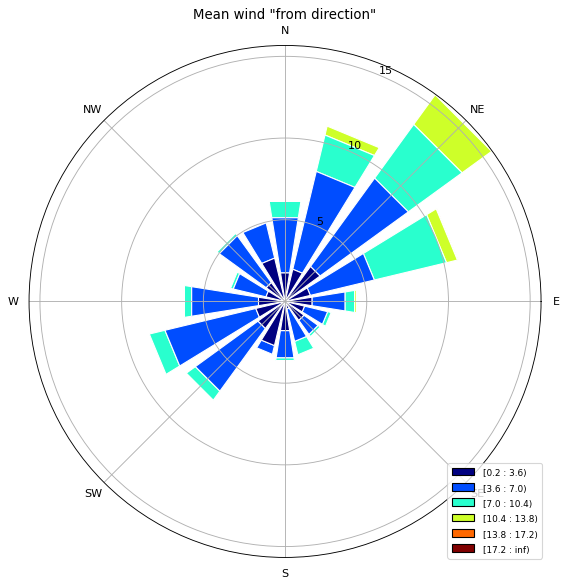

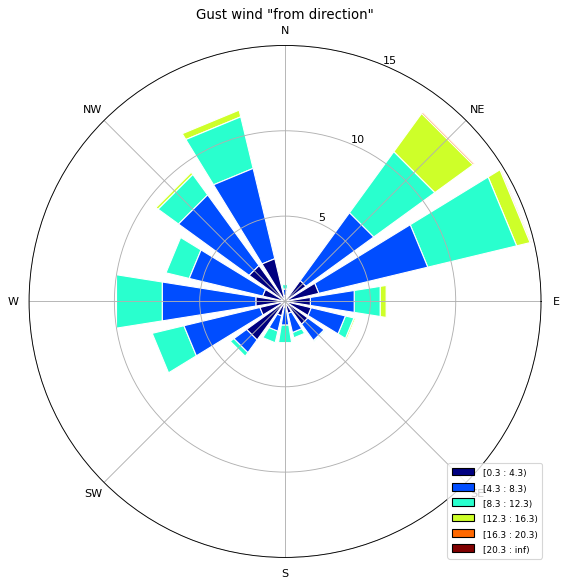

In [6]:
# Wind rose plot

# Mean wind dir/sp
ax=WindroseAxes.from_ax()
ax.bar(wdir_mean, wsp_mean, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc=4)
plt.title('Mean wind "from direction"')
ax.set_yticks(np.arange(5, 20, step=5))
ax.set_yticklabels(np.arange(5, 20, step=5))
# ax.set_xticklabels((90, 45, 0, 315, 270, 225, 180, 135)) # Add this line bc there is an error in windrose axes
ax.set_xticklabels(['E', 'NE','N', 'NW', 'W', 'SW', 'S', 'SE']); # Add this line bc there is an error in windrose axes
plt.savefig(figpath1149+'1149_Windrose_Mean')

# Gust wind dir/sp
ax=WindroseAxes.from_ax()
ax.bar(wdir_max, wsp_max, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc=4)
plt.title('Gust wind "from direction"')
ax.set_yticks(np.arange(5, 20, step=5))
ax.set_yticklabels(np.arange(5, 20, step=5))
#ax.set_xticklabels((90, 45, 0, 315, 270, 225, 180, 135)) # Add this line bc there is an error in windrose axes
ax.set_xticklabels(['E', 'NE','N', 'NW', 'W', 'SW', 'S', 'SE']); # Add this line bc there is an error in windrose axes
plt.savefig(figpath1149+'1149_Windrose_Gust')

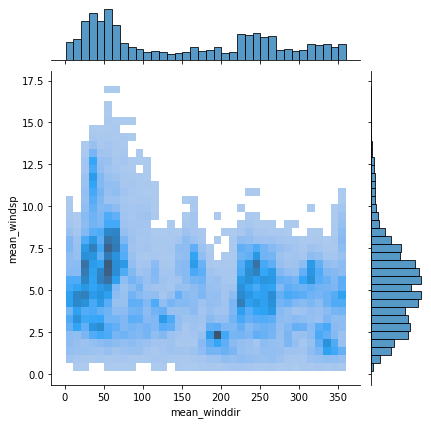

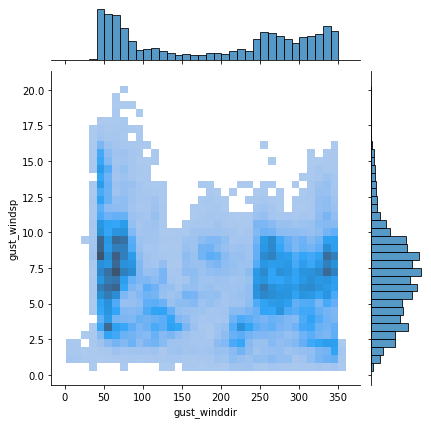

In [7]:
# Compute joint-probability

# Mean wind dir/sp
df_wind_mean=pd.DataFrame({'mean_windsp': wsp_mean, 'mean_winddir': wdir_mean})
sns.jointplot(data=df_wind_mean, x="mean_winddir", y="mean_windsp", bins=36, kind="hist", marginal_kws=dict(bins=36))
plt.savefig(figpath1149+'1149_JointProb_Mean')

# Gust wind dir/sp
df_wind_gust=pd.DataFrame({'gust_windsp': wsp_max, 'gust_winddir': wdir_max})
sns.jointplot(data=df_wind_gust, x="gust_winddir", y="gust_windsp", bins=36, kind="hist", marginal_kws=dict(bins=36))
plt.savefig(figpath1149+'1149_JointProb_Gust')

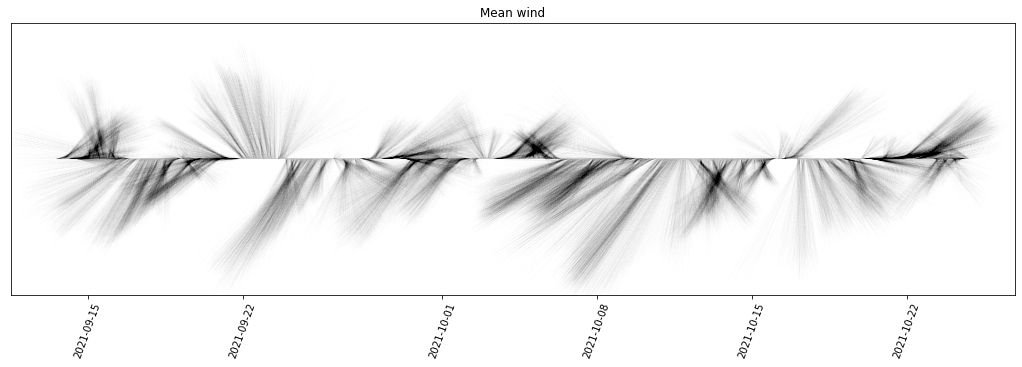

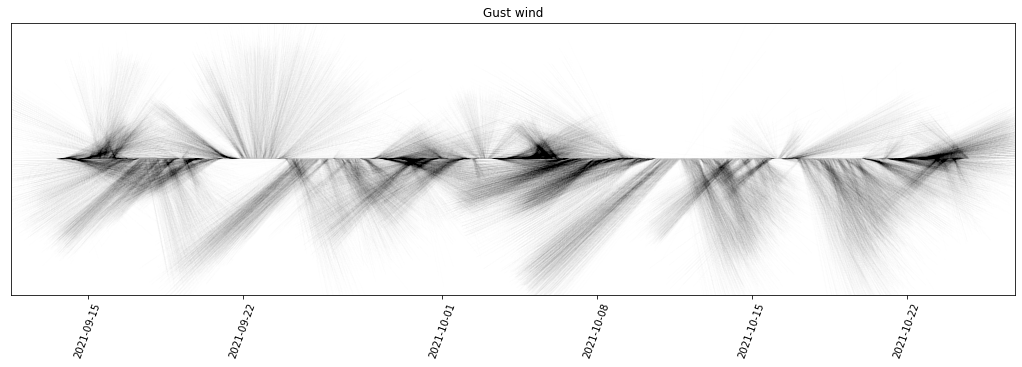

In [10]:
# Stick plots

# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_mean * np.sin(np.radians(wdir_mean))
v_mean = -wsp_mean * np.cos(np.radians(wdir_mean))

props = {'units' : "dots",
    'width' : 0.003,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(figsize=(18, 5))
qiv = ax.quiver(time, [[0]*len(time)] , u_mean, v_mean, angles='uv', **props)
plt.xticks(rotation=70)
ax.axes.yaxis.set_visible(False)
plt.title('Mean wind')

# Calculate wind components from speed and metereological wind direction (wind from direction)
u_max = -wsp_max * np.sin(np.radians(wdir_max))
v_max = -wsp_max * np.cos(np.radians(wdir_max))

props = {'units' : "dots",
    'width' : 0.003,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(figsize=(18, 5))
qiv = ax.quiver(time, [[0]*len(time)] , u_max, v_max, angles='uv', **props)
plt.xticks(rotation=70)
ax.axes.yaxis.set_visible(False)
plt.title('Gust wind');

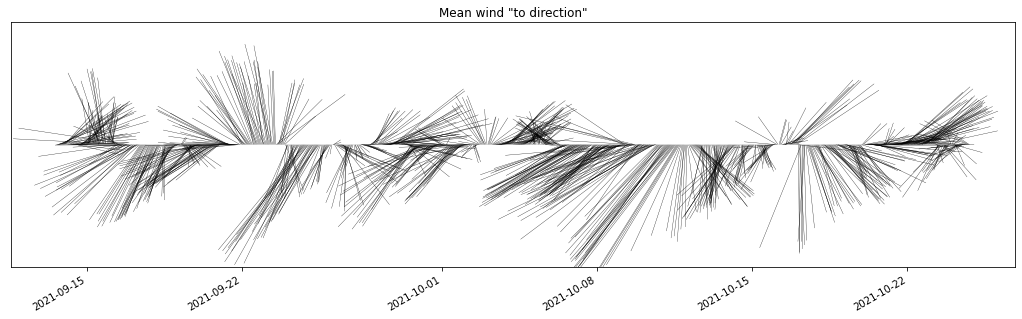

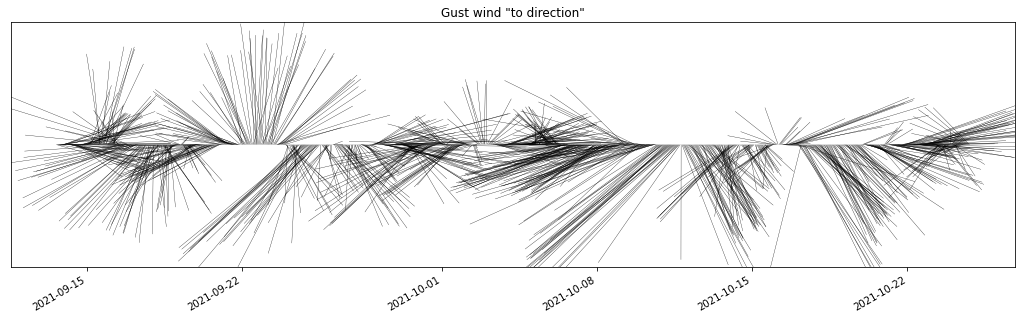

In [11]:
# Stick plots of rolling average

# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_mean * np.sin(np.radians(wdir_mean))
v_mean = -wsp_mean * np.cos(np.radians(wdir_mean))

# Calculate rolling average of wind components
u_mean_roll=bn.move_mean(u_mean, window=61) # Returns same length with NaNs at beginning
v_mean_roll=bn.move_mean(v_mean, window=61)

# Get hourly samples: Start at 60 and grab every 60 values since samples are on the minute
u_mean_hourly=u_mean_roll[60::60] 
v_mean_hourly=v_mean_roll[60::60]
time_hourly=time[60::60]

props = {'units' : "dots",
    'width' : 0.3,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(figsize=(18, 5))
qiv = ax.quiver(time_hourly, [[0]*len(time_hourly)] , u_mean_hourly, v_mean_hourly, angles='uv', **props)
fig.autofmt_xdate()
ax.axes.yaxis.set_visible(False)
plt.title('Mean wind "to direction"')
plt.savefig(figpath1149+'1149_StickRollAvg_Mean')

# Calculate wind components from speed and metereological wind direction (wind from direction)
u_max = -wsp_max * np.sin(np.radians(wdir_max))
v_max = -wsp_max * np.cos(np.radians(wdir_max))

# Calculate rolling average of wind components
u_max_roll=bn.move_mean(u_max, window=61) # Returns same length with NaNs at beginning
v_max_roll=bn.move_mean(v_max, window=61)

# Get hourly samples: Start at 60 and grab every 60 values since samples are on the minute
u_max_hourly=u_max_roll[60::60] 
v_max_hourly=v_max_roll[60::60]
time_hourly=time[60::60]

props = {'units' : "dots",
    'width' : 0.3,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(figsize=(18, 5))
qiv = ax.quiver(time_hourly, [[0]*len(time_hourly)] , u_max_hourly, v_max_hourly, angles='uv', **props)
fig.autofmt_xdate()
ax.axes.yaxis.set_visible(False)
plt.title('Gust wind "to direction"');
plt.savefig(figpath1149+'1149_StickRollAvg_Gust')